In [1]:
# This is a sample Python script.
import copy

import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

#### Alkuarvot
- mittayksikkö (m)

In [2]:
skanneri_dx = 0.02   # vierekkäisten skanneri pisteiden x-akseli välinen ero
lehden_sade = 0.1414 # Lehden säde
dy = 0.074835        # Kerroksien välinen etäisyys
data = pd.read_csv('scanneri_kerroksien_data.csv').to_numpy()[:, 1:]

#### Funktiot
- Skanneri ja lehden generointi

100%|████████████████████████████████████████████████████████████████████████████████████████| 158/158 [00:00<?, ?it/s]


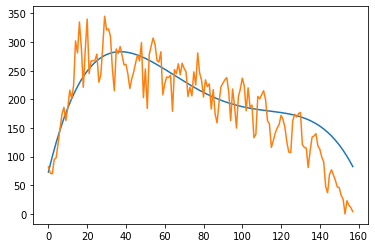

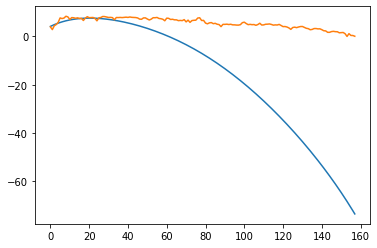

In [3]:
y_kerrososumat = lambda x : -7E-06 * np.power(x,4) + 0.0025 * np.power(x,3) - 0.309 * np.power(x,2) + 14.04 * x + 73.175
y_kerrosleveys  = lambda x : -2E-11*x**6 + 1E-08*x**5 - 2E-06*x**4 + 0.0002*x**3 - 0.0143*x**2 + 0.3922*x + 4.1492

x_axis = [i for i in range(158)]

tmp_osumat = []
tmp = []
for kerros in tqdm( range(len(data)) ):
    [kerros_osumat, kerros_leveys] = data[kerros]
    tmp.append(kerros_leveys)
    tmp_osumat.append(kerros_osumat)
    
plt.plot([y_kerrososumat(x) for x in x_axis])
plt.plot(tmp_osumat)
plt.show()
plt.plot([y_kerrosleveys(x) for x in x_axis])
plt.plot(tmp)

In [15]:
def skannaus(lehdet, leveys, y, lehden_sade) -> int:
    """Skannaa kerroksen ja palauttaa osumamäärän"""
    tmp_lehdet = np.array( copy.deepcopy(lehdet) )
    p = [ (True if (y-lehden_sade <= plehti[1] and plehti[1] <= y + lehden_sade ) else False) for plehti in tmp_lehdet]
    tmp_lehdet = tmp_lehdet[p]

    osumat = 0
    # Loopataan kerros läpi
    for x in np.arange(-leveys/2 - skanneri_dx/2, leveys/2 + skanneri_dx/2, skanneri_dx):
        p_skanneri = np.array([x, y])

        # tarkastetaan osuuko joku skanneriin
        for i in range(len(tmp_lehdet)):
            p_lehti = tmp_lehdet[i]
            dist = np.linalg.norm(p_lehti - p_skanneri)
            
            if dist <= lehden_sade:
                osumat += 1
                break

    return osumat, len(tmp_lehdet)

def generoi_lehti(lehdet, leveys:float, y:float, dy:float, lehden_sade=lehden_sade) -> list:
    """ Lisää lehden ja palauttaa uuden lehti listan"""
    y_min = y - dy/2 # ala-raja y-akselissa
    y_max = y + dy/2 #dy/2 # ylä-raja y-akselissa

    # arvotaan lehden paikka
    x = np.random.uniform(-leveys/2, leveys/2)
    y = np.random.uniform(y_min, y_max)
    # Listätään uusi lehti listaan
    lehdet.append( np.array([x, y]))

    return lehdet

#### Pää-silmukka

In [20]:
def main():
    lehtilista = []
    lehtiä_kerroksessa = []

    for kerros in tqdm( range(len(data)) ):
        [kerros_osumat, kerros_leveys] = data[kerros]
        # Kerroskorkeus
        y = (kerros) * dy
        
        if kerros_osumat == 0:
            continue

        while True:
            osumamäärä, N = skannaus(lehdet=lehtilista, leveys=kerros_leveys, y=y, lehden_sade=lehden_sade)

            if osumamäärä >= kerros_osumat:
                lehtimäärä=len(lehtilista)
                lehtiä_kerroksessa.append(N)
                break

            lehtilista = generoi_lehti(lehdet=lehtilista, leveys=kerros_leveys, y=y, dy=dy, lehden_sade=lehden_sade)
            
    print(f"lehtiä:{lehtimäärä}")
    return lehtilista, lehtiä_kerroksessa

In [21]:
silmukan_lehtimaara = []
for i in range(1):
    tmp_lehtilista, tmp_lehtia_kerroksessa = main()
    silmukan_lehtimaara.append(len(tmp_lehtilista))

100%|████████████████████████████████████████████████████████████████████████████████| 158/158 [01:04<00:00,  2.47it/s]

lehtiä:2121


In [22]:
#Lasketaan jokaisen kerroksen lehtien keskiarvo
lehtien_keskiarvo = sum(silmukan_lehtimaara) / len(silmukan_lehtimaara)
print(lehtien_keskiarvo)
# lehtien_keskiarvo

2121.0


In [23]:
counts = silmukan_lehtimaara #lehtiä_kerroksessa
df = pd.DataFrame({"N" : silmukan_lehtimaara}, index=[i+1 for i in range(len(lehtiä_kerroksessa))])
df.to_excel("data/sim_lehtiä_kerroksessa.xlsx")
plt.stairs(counts, [i + 1 for i in range(len(counts) + 1)], fill=True)
plt.xlabel('Kerros (N)')
plt.ylabel('Lehtiä (N)')
plt.savefig('data/sim_lehtiä_kerroksessa.png')

NameError: name 'lehtiä_kerroksessa' is not defined

In [24]:
lehtien_keskiarvo * 0.08 #* np.pi * lehden_sade**2

169.68